In [1]:
import numpy as np
import os, glob
import gdal, osr # python2.7
# import MisrToolkit as Mtk # python2.7
# from MisrToolkit import * # 
# from subprocess import call
# import datetime as dt
from matplotlib import pyplot as plt
import matplotlib.cm as cm

In [2]:
date_label = "4 April 2013"
print(date_label)

4 April 2013


In [3]:
mosaic_file_fullpath = '/Volumes/Ehsanm_DRI/research/MISR/roughness_files/from_PH/roughness_2013_apr1to16_p1to233_b1to40/roughness_subdir_2013_4_4/rasters/mosaic_fromVRT_byte_allDays.tif'

print(mosaic_file_fullpath)

/Volumes/Ehsanm_DRI/research/MISR/roughness_files/from_PH/roughness_2013_apr1to16_p1to233_b1to40/roughness_subdir_2013_4_4/rasters/mosaic_fromVRT_byte_allDays.tif


In [4]:
#~ check if ratster exist
if (os.path.isfile(mosaic_file_fullpath)):
    print('-> input mosaic found!')
else:
    print('-> raster NOT exist!')

-> input mosaic found!


In [5]:
#~ raster2array: read data from raster in to array
dataset = gdal.Open(mosaic_file_fullpath)
print('-> dataset type: %s' %type(dataset))

-> dataset type: <class 'osgeo.gdal.Dataset'>


In [6]:
raster = dataset.GetRasterBand(1)

## build a dictionary to fill w/ metadata

In [7]:
metadata = {}
print(type(metadata))

<type 'dict'>


## we create metadata

In [8]:
metadata['array_rows'] = dataset.RasterYSize
metadata['array_cols'] = dataset.RasterXSize

print('rows: %s' % metadata['array_rows'])
print('columns: %s' % metadata['array_cols'])

rows: 27577
columns: 24331


## geoTransform info

In [9]:
geotransform = dataset.GetGeoTransform()
print(geotransform) # note: units in meters
print('order of geoTransform matrix= tlX, pixelW, 0, tlY, 0, pixelH')

(-3198805.890651603, 231.4976545292067, 0.0, 3186305.968451056, 0.0, -231.4976545292067)
order of geoTransform matrix= tlX, pixelW, 0, tlY, 0, pixelH


In [10]:
xMin = geotransform[0]
xMax = geotransform[0] + dataset.RasterXSize*geotransform[1] # i changed it to * to get xMax value
yMin = geotransform[3] + dataset.RasterYSize*geotransform[5]
yMax = geotransform[3]

In [11]:
print(xMin)
print(xMax)
print(yMin)
print(yMax)

-3198805.89065
2433763.5417
-3197704.8505
3186305.96845


In [12]:
# metadata['extent'] = (xMin,xMax,yMin,yMax)
plot_extent = (xMin,xMax,yMin,yMax)

## get shape of roughness data

In [13]:
array_shape = raster.ReadAsArray(0,0, metadata['array_cols'], metadata['array_rows']).astype('byte').shape # check this f(.)
print(array_shape)

(27577, 24331)


## build an array with zeros

In [14]:
roughness_array = np.zeros((array_shape[0], array_shape[1], dataset.RasterCount), dtype='byte') # check f(.) arguments

In [15]:
print(roughness_array.dtype)
print(roughness_array.min())
print(roughness_array.max())

int8
0
0


## read roughess data and fill zero array with it

In [16]:
roughness_array = raster.ReadAsArray(0, 0, metadata['array_cols'], metadata['array_rows']).astype('float64')

In [17]:
print(type(roughness_array))
print('-> roughness min: %s' % roughness_array.min())
print('-> roughness max: %s' % roughness_array.max())

<type 'numpy.ndarray'>
-> roughness min: 0.0
-> roughness max: 255.0


## now plot roughness array

In [18]:
cmap_title = 'roughness'
plot_title = 'Sea Ice Surface Roughness for '+date_label  # find a good title for plot

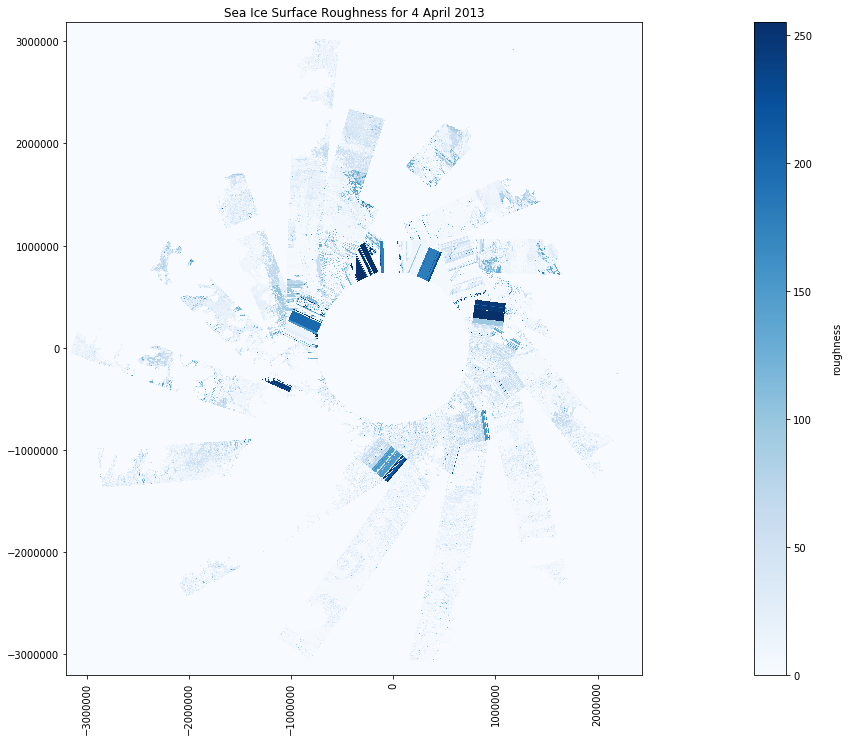

In [19]:
plt.figure(figsize = (40,12))

plot = plt.imshow(roughness_array, extent=plot_extent, vmin=0, vmax=roughness_array.max(), interpolation='nearest')#, aspect='none')

# colormap = 'Greys'
# colormap = 'jet'
colormap = 'Blues'
plt.set_cmap(colormap)

cbar = plt.colorbar(plot,aspect=20)
cbar.set_label(cmap_title,rotation=90,labelpad=20)
plt.title(plot_title)
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain')
rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90)

In [20]:
dataset = None